In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn as nn
import torch.optim as optim
import torch
from sklearn.model_selection import train_test_split

from models import NMF_liz

In [2]:
# Load the .tsv file
data = pd.read_csv("data/GEL_data/catalogues_Ovary_SBS.tsv", sep="\t")

In [3]:
# We need to transpose the data because the colums contain the patient data and the rows contain the specifc mutations
train, test = train_test_split(data.T, test_size=0.2)


train = train.T.to_numpy()
test = test.T.to_numpy()

#print(train.shape)
#print(test.shape)



In [4]:
model = NMF_liz.NMF_mult(X= train, rank=4, tol=1e-10, F_0 = None, G_0 = None)

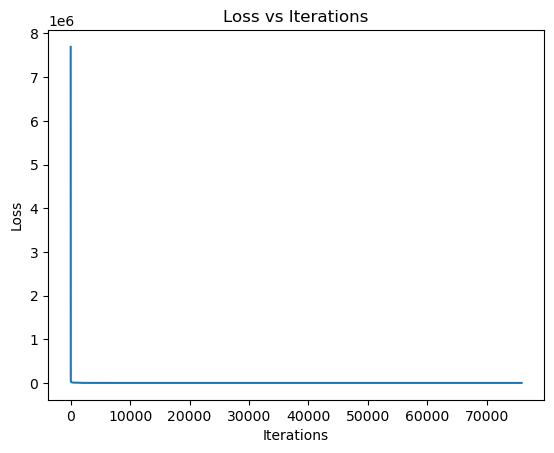

Last Loss:  4539.117625903923


In [5]:
loss = model[2]
plt.plot(loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs Iterations')
plt.show()
print("Last Loss: ", loss[-1])



In [6]:
G = model[1] # exposure
F = model[0] # signature 

In [7]:
from functions import *


In [8]:
diag = F.sum(axis=0)
exp = np.diag(diag)@G
sig = F@np.diag(1/diag)

out_error = reconstruction_error(test,F)
print(out_error)

AttributeError: 'numpy.ndarray' object has no attribute 'apply'